# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combination = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
data_combination = data_combination [['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

data_combination.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [70]:
# Checking the number of mice.
mice_number = len(data_combination['Mouse ID'].unique())
print(f'The total number of unique Mouse IDs in this study is {mice_number}.')

The total number of unique Mouse IDs in this study is 249.


In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = data_combination.loc[data_combination.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [82]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = data_combination.loc[data_combination["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = data_combination[data_combination['Mouse ID'].isin(duplicate_mice)==False]
clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [86]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_dataframe['Mouse ID'].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mice_mean = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mice_median = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mice_variance = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mice_std = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mice_sem = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
data_combination_sum_df = pd.DataFrame({"Mean Tumor Volume": mice_mean,
                                        "Median Tumor Volume": mice_median,
                                        "Variance Tumor Volume": mice_variance,
                                        "Standard Deviation Tumor Volume": mice_std,
                                        "Standard Error Tumor Volume": mice_sem }).style.set_caption("Summary Statistics for Tumor Volume")
data_combination_sum_df                                        


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [92]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_dataframe.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

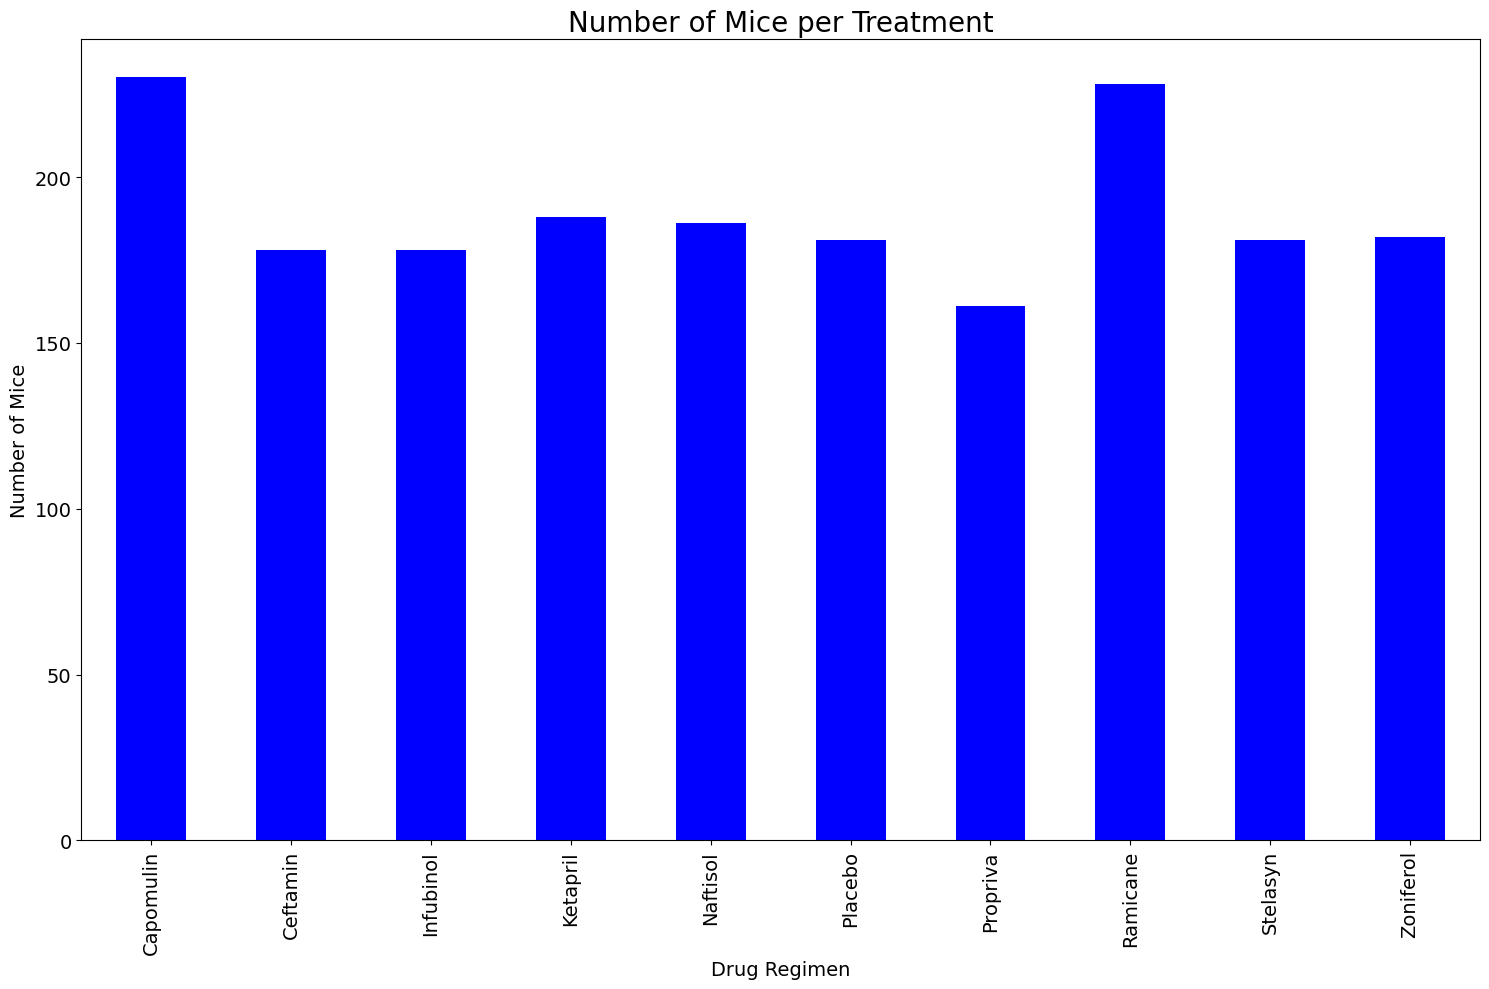

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = data_combination.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = mice_count.plot.bar(figsize=(15,10), color='b',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.tight_layout()
plt.show()


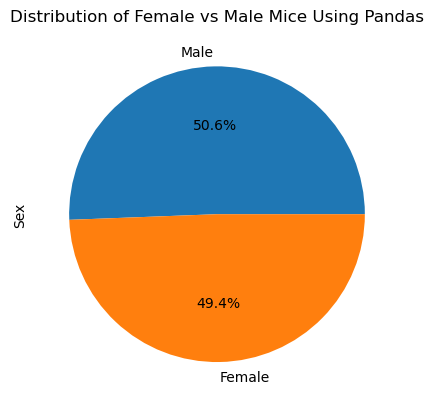

In [100]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
gender_counts = data_combination['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Distribution of Female vs Male Mice Using Pandas')
plt.show()

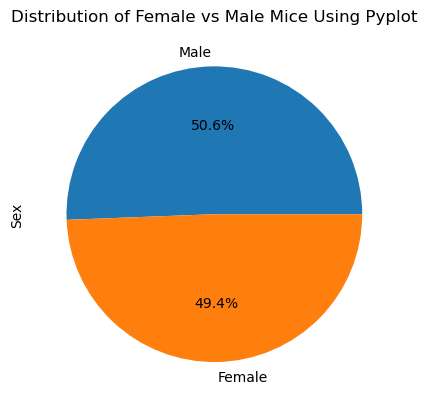

In [104]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
labels = ['Male, Female']
plot = gender_counts.plot.pie(y = 'Sex', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title('Distribution of Female vs Male Mice Using Pyplot')
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = data_combination.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(data_combination, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers
# Locate the rows which contain mice on each drug and get the tumor volumes                            
# add subset                       
# Determine outliers using upper and lower bounds


by_mouse = data_combination.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(data_combination,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")



Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


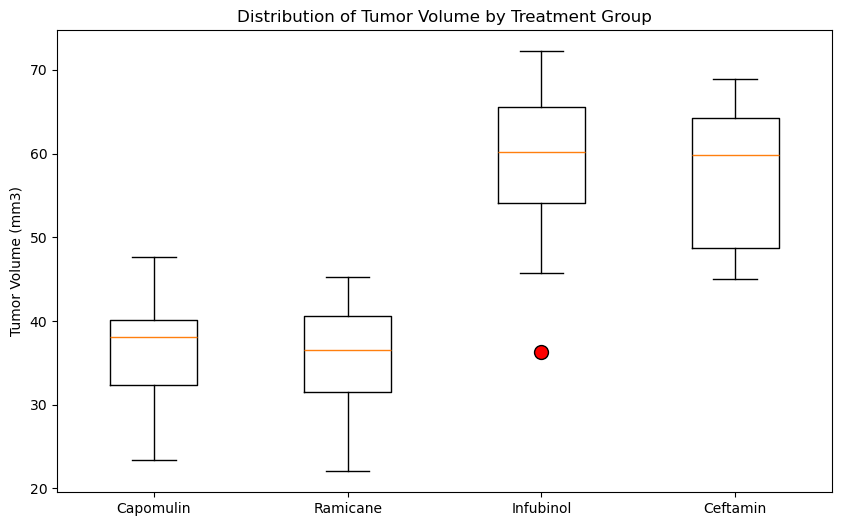

In [118]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

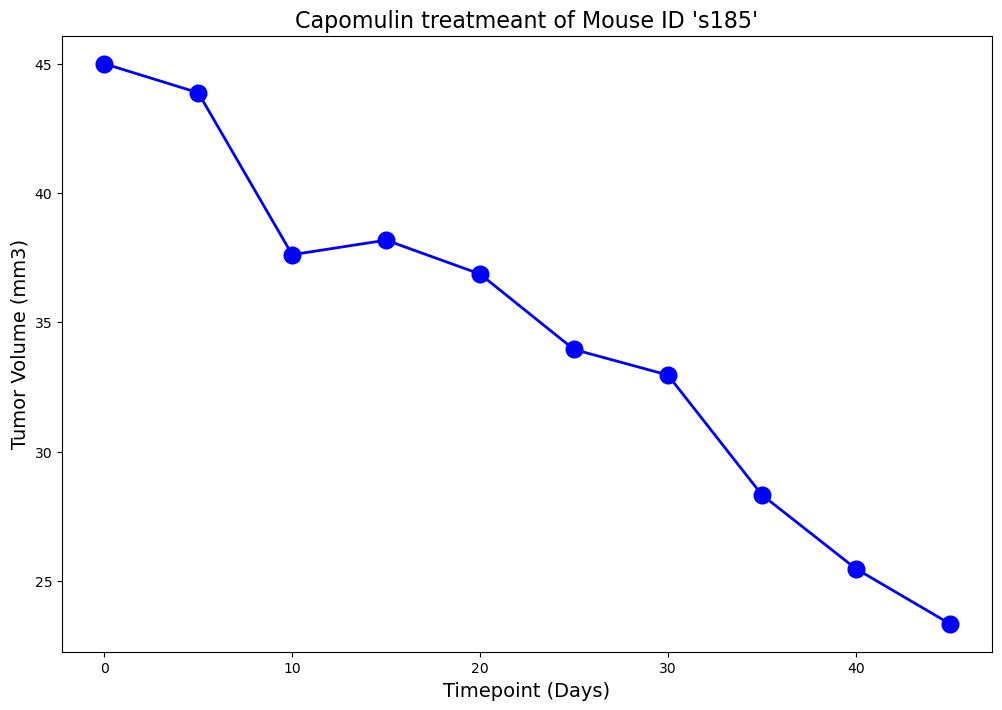

In [179]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = data_combination.loc[data_combination["Drug Regimen"] == "Capomulin",:]
capomulin_df

mouse_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
mouse_in_capomulin

# Specify plot parameters
x_axis = mouse_in_capomulin["Timepoint"]
tumor_volume = mouse_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin treatmeant of Mouse ID 's185'",fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12,marker="o",color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)

plt.show()


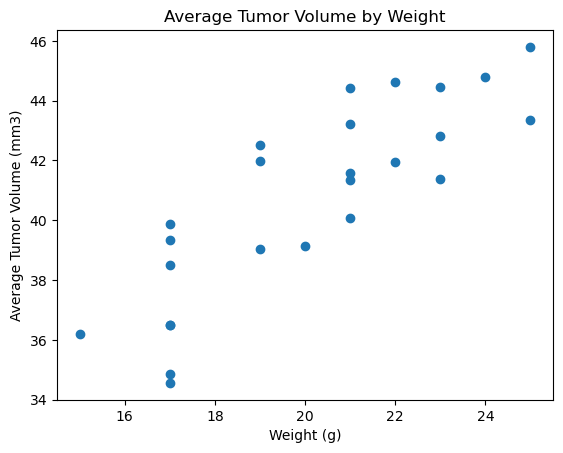

In [189]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = data_combination.loc[data_combination['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']


plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.53


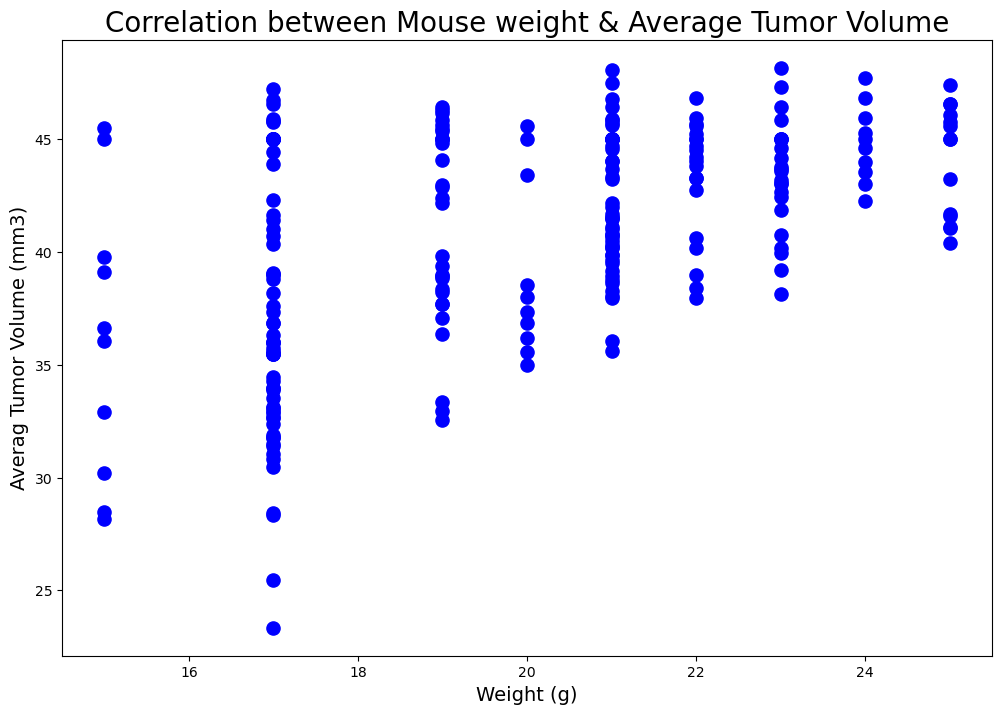

In [196]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(avg_vol_df['Weight (g)'],avg_vol_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_vol_df['Weight (g)'],avg_vol_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Correlation between Mouse weight & Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 14)

plt.show()
